In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

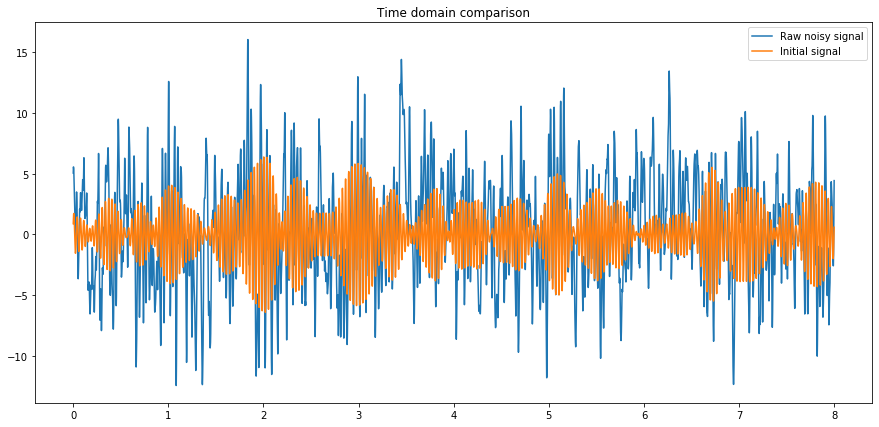

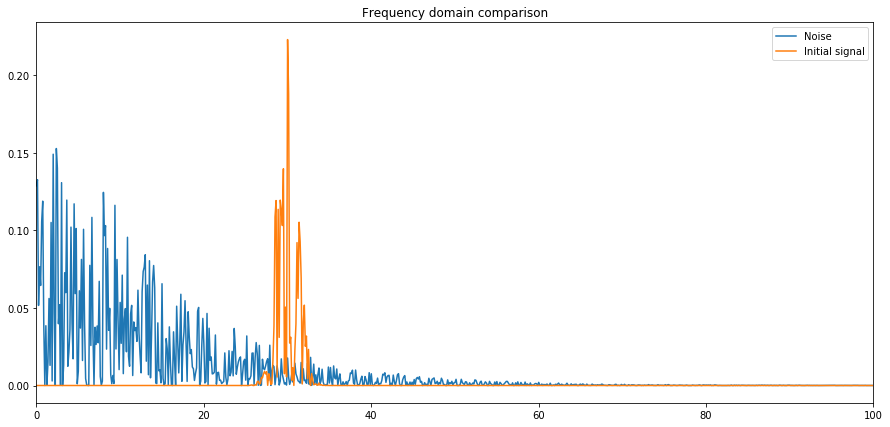

In [12]:
# generate 1/f noise
n_signal = 8000
sample_frequency = 1000
as1 = np.random.rand(n_signal) * np.exp(-np.arange(0, n_signal) / 200)
frequency_noise = as1 * np.exp(1j * 2 * np.pi * np.random.rand(len(as1)))
noise = np.real(np.fft.ifft(frequency_noise)) * n_signal

# create frequency-domain Gaussian
hz = np.linspace(0, sample_frequency, n_signal)
s = 4 * (2 * np.pi - 1) / (4 * np.pi);  # normalized width
x = hz - 30  # shifted frequencies
frequency_gaussian = np.exp(-.5 * (x / s) ** 2)  # gaussian

fc = np.random.rand(n_signal) * np.exp(1j * 2 * np.pi * np.random.rand(n_signal))
fc = fc * frequency_gaussian

# generate signal from Fourier coefficients, and add noise
initial_signal = np.real(np.fft.ifft(fc)) * n_signal
raw_signal = initial_signal + noise
time_axis = np.arange(0, n_signal) / sample_frequency

#Plotting
plt.figure(figsize=(15, 7))
plt.plot(time_axis, raw_signal, label='Raw noisy signal')
plt.plot(time_axis, initial_signal, label='Initial signal')
plt.legend()
plt.title('Time domain comparison')
plt.show()

plt.figure(figsize=(15, 7))
plt.plot(hz, abs(np.fft.fft(noise) / n_signal) ** 2, label='Noise')
plt.plot(hz, abs(np.fft.fft(initial_signal) / n_signal) ** 2, label='Initial signal')
plt.legend()
plt.xlim([0, 100])
plt.title('Frequency domain comparison')
plt.show()


c:\users\neural_creator\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


Text(0.5, 1.0, 'Filter frequency domain')

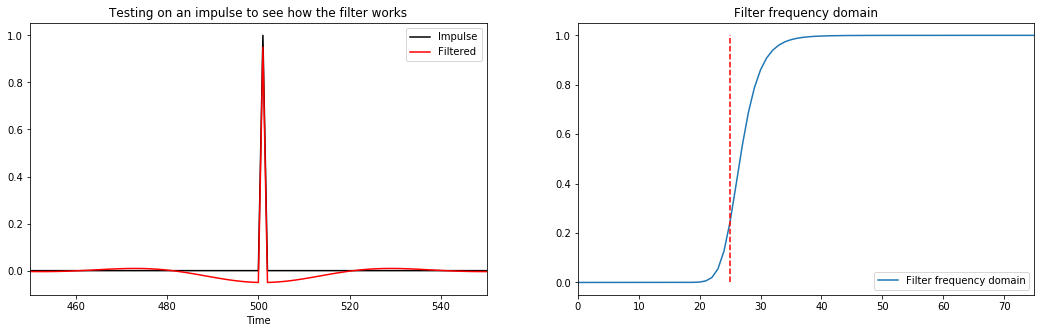

In [41]:
# Using high pass filter with butterworth

frequency_cutoff = 25
nyquist_rate = sample_frequency / 2
order = 7

coef_kernel_B, coef_kernel_A = signal.butter(order, frequency_cutoff / nyquist_rate, btype='high')

# Testing on an impulse to see how the filter works
impulse_signal = np.zeros(1001)
impulse_signal[501] = 1
filtered_impulse_signal = signal.filtfilt(coef_kernel_B, coef_kernel_A, impulse_signal)

# Time domain
plt.figure(figsize=(18, 5))
plt.subplot(121)
plt.plot(impulse_signal, 'k', label='Impulse')
plt.plot(filtered_impulse_signal, 'r', label='Filtered')
plt.xlim([450, 550])
plt.legend()
plt.xlabel('Time')
plt.title('Testing on an impulse to see how the filter works')


# Frequency domain
filtered_impulse_signal_power = abs(np.fft.fft(filtered_impulse_signal)) ** 2
hz_axis = np.linspace(0, nyquist_rate, np.floor(len(impulse_signal) / 2) + 1)
filtered_impulse_signal_power = filtered_impulse_signal_power[:len(hz_axis)]

plt.subplot(122)
plt.plot(hz_axis, filtered_impulse_signal_power, label='Filter frequency domain')
plt.plot([frequency_cutoff, frequency_cutoff], [0, 1], 'r--')
plt.xlim([0, frequency_cutoff * 3])
plt.legend()
plt.title('Filter frequency domain')


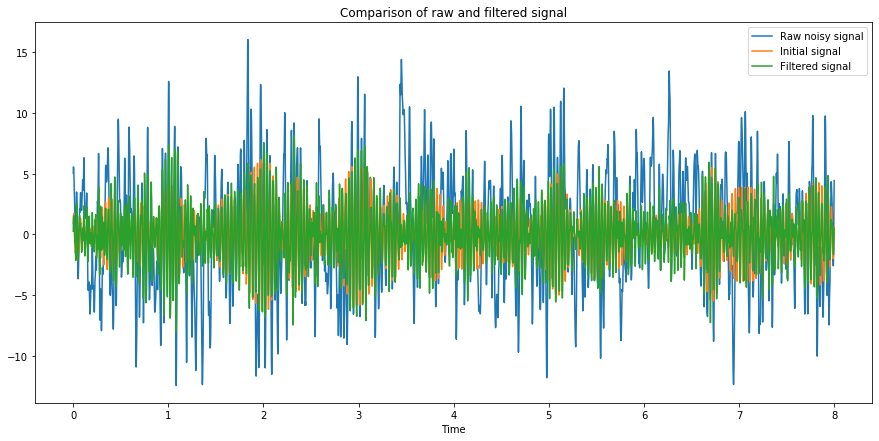

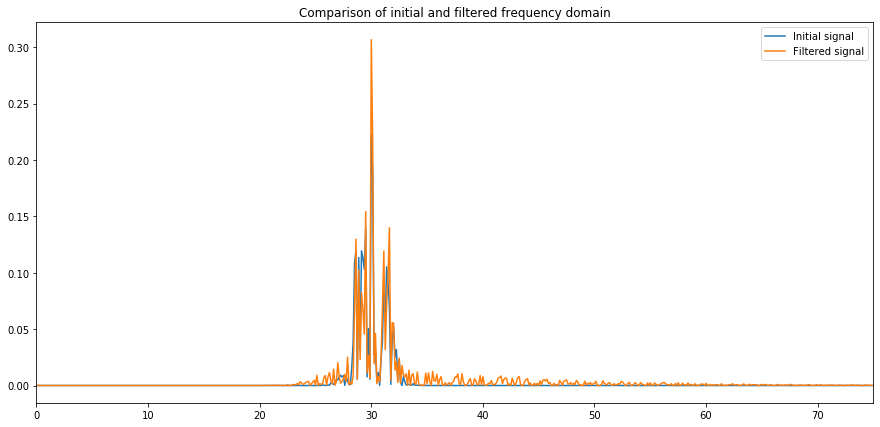

In [48]:
filtered_signal = signal.filtfilt(coef_kernel_B, coef_kernel_A, raw_signal)

# Time domain
plt.figure(figsize=(15, 7))

plt.plot(time_axis, raw_signal, label='Raw noisy signal')
plt.plot(time_axis, initial_signal, label='Initial signal')
plt.plot(time_axis, filtered_signal, label='Filtered signal')
plt.legend()
plt.xlabel('Time')
plt.title('Comparison of raw and filtered signal')
plt.show()

# Frequency domain
plt.figure(figsize=(15, 7))
plt.plot(hz, abs(np.fft.fft(initial_signal) / n_signal) ** 2, label='Initial signal')
plt.plot(hz, abs(np.fft.fft(filtered_signal) / n_signal) ** 2, label='Filtered signal')
plt.xlim([0, frequency_cutoff * 3])
plt.legend()
plt.title('Comparison of initial and filtered frequency domain')
plt.show()
